In [66]:
# Dushyant Krishna Sharma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
# data description
data = pd.read_csv("BostonHousing.csv")
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [68]:
# null values
print(data.isnull().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [69]:
# removing null values
data = data.dropna()


In [70]:
X = data.drop("MEDV", axis=1)
y = data["MEDV"]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [72]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [73]:
y_pred = model.predict(X_test)


In [74]:
#printing mean square , root mean square and r2 score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Squared Error: 31.454047664950867
Root Mean Squared Error: 5.608390826694486
R^2 Score: 0.6270849941673191


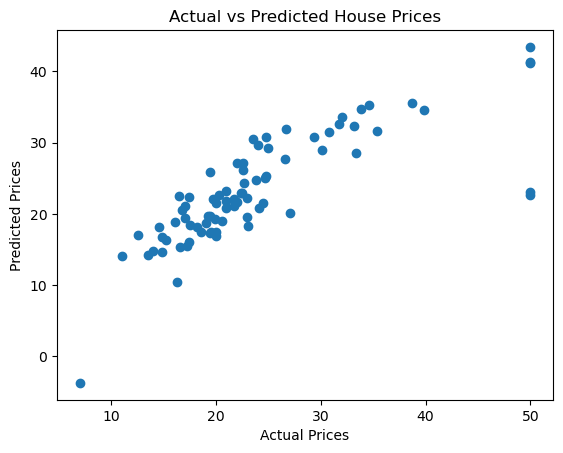

In [75]:
# actual vs predicted house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


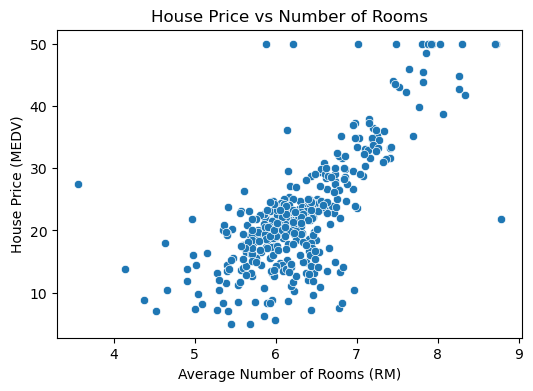

In [76]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data["RM"], y=data["MEDV"])
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("House Price vs Number of Rooms")
plt.show()


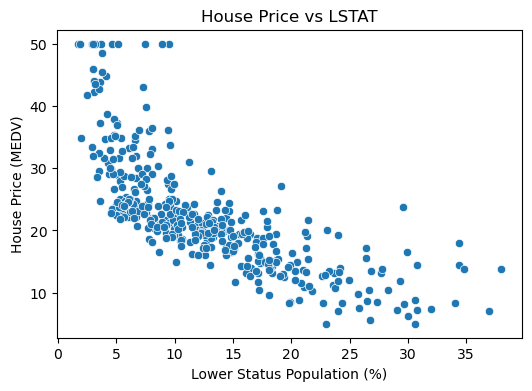

In [77]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data["LSTAT"], y=data["MEDV"])
plt.xlabel("Lower Status Population (%)")
plt.ylabel("House Price (MEDV)")
plt.title("House Price vs LSTAT")
plt.show()


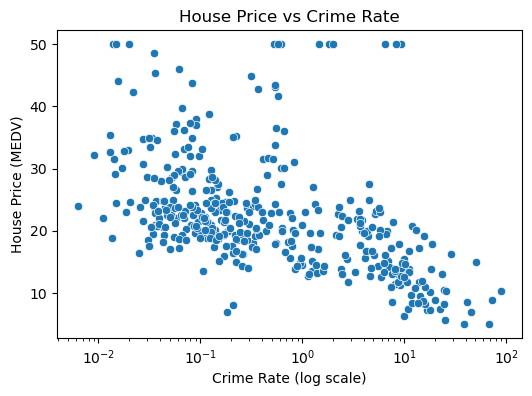

In [101]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data["CRIM"], y=data["MEDV"])
plt.xscale("log")
plt.xlabel("Crime Rate (log scale)")
plt.ylabel("House Price (MEDV)")
plt.title("House Price vs Crime Rate")
plt.show()

In [115]:
features = data.drop("MEDV", axis=1).columns
results = []

for feature in features:
    X = data[[feature]]
    y = data["MEDV"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=12
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([feature, mse, rmse, r2])


In [117]:
results_df = pd.DataFrame(
    results,
    columns=["Feature", "MSE", "RMSE", "R2 Score"]
)

results_df = results_df.sort_values(by="R2 Score", ascending=False)

print("\nSINGLE LINEAR REGRESSION RESULTS (ALL PARAMETERS)")
print(results_df)



SINGLE LINEAR REGRESSION RESULTS (ALL PARAMETERS)
    Feature        MSE      RMSE  R2 Score
5        RM  24.072058  4.906328  0.551473
12    LSTAT  24.114979  4.910700  0.550673
2     INDUS  36.548624  6.045546  0.319001
9       TAX  37.099593  6.090944  0.308735
10  PTRATIO  43.492246  6.594865  0.189623
8       RAD  44.723244  6.687544  0.166686
6       AGE  45.554442  6.749403  0.151198
0      CRIM  46.435963  6.814394  0.134773
11        B  47.426302  6.886676  0.116321
1        ZN  47.726652  6.908448  0.110724
4       NOX  47.879281  6.919486  0.107880
7       DIS  51.328924  7.164421  0.043604
3      CHAS  56.800846  7.536634 -0.058352
